# “Ruten: Find a reasonable category price of Goods”
1. Query in entire "Goods" Dataset
2. Query of similar items obtained, in "Orders" Dataset
3. Graphic analysis
4. Reasonable price range using confidence interval
5. Boxcox method to determine outliers 
6. Regresion Model to determine Recommended item price
7. Boxplot to determinate price range bounds. 
8. Results Summary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import json
import numpy as np
import io
pd.options.display.max_colwidth = 100
import warnings
warnings.filterwarnings('ignore')
def count_digits(string):
    return sum(item.isdigit() for item in string)

# 1. Query in entire "Goods" Dataset

In [2]:
#create a dataframe containing queries in the entire Dataset
totalquery=pd.DataFrame()
File_numbers=201
key_word="PS5"
for i in range(File_numbers):
    if i<10:
        ad="0000"
    elif i>9 and i<100:
        ad="000"
    else:
        ad="00"
    path="C:/Users/Nico/OneDrive/Escritorio/Ruten/goods/part-r-"+ad+str(i)
    goods=pd.read_json(path,lines=True)
    goods= goods.dropna()
    query=goods[goods['item_name'].str.contains(key_word)]
    query['file_name'] = str(i)
    concatenate=[query,totalquery]
    totalquery=pd.concat(concatenate)
index=totalquery["file_name"].astype(int).unique().tolist()
totalquery.head()

,category_name,category_id,item_id,price,item_name,seller_nickname,seller_id,file_name
3446,控制器、周邊配備,002200060003,21645272185272,1000,PS5 / PS4 / PS3 主機用 台灣帳號 PSN 電子錢包 1000點 實體卡(售價1000元)【台中大眾電玩】,afd533,9128511,200
4882,動作冒險,0022000600020003,21801552084400,250,【WC電玩】PS4 PS5 英文 MLB 21 The Show（隨身版 / 認證版）數位下載 無光碟非序號,lee8897,4732030,200
14092,射擊,0022000600020004,22048097616926,1850,[裘比屋]全新現貨 PS5 決勝時刻 黑色行動 冷戰 中文版 804,chubygame,4039343,200
14890,動作冒險,0022000600020003,22052450328788,1450,【德周 新竹店】（二手含稅）PS5小小大冒險 中文版【EE2913】,girllouisa,7574852,200
15224,運動,0022000600020005,22101585669634,2650,[裘比屋]全新現貨 PS5 NBA 2K21 永懷曼巴版 中文版 425,chubygame,4039343,200


In [3]:
key_word2="RESIDENT EVIL"
totalquery = totalquery[totalquery['item_name'].str.contains(key_word2)]
items=totalquery["item_id"].to_list()
index=totalquery["file_name"].astype(int).unique().tolist()
totalGoodQuery=totalquery[["item_id","price"]]
totalGoodQuery=totalGoodQuery.reset_index(drop=True)
totalquery.head()

,category_name,category_id,item_id,price,item_name,seller_nickname,seller_id,file_name
19865,其他類型,0022002600030009,22118250829358,9999990,有間電玩 現貨 PS5 惡靈古堡8 村莊 RESIDENT EVIL VILLAGE 中文版 首批特典,a080186,8013934,189
2579,運動,0022000600020005,21548178643638,1500,【優格米】PS4 PS5 惡靈古堡8 村莊 RESIDENT EVIL VILLAGE 中文版,daniel731112,3719508,151
20056,電玩記念品,00220005,22120592079997,2000,PS4 PS5 惡靈古堡 8 村莊 BIOHAZARD RESIDENT EVIL VILLAGE 限定特典 鐵盒,whitedragon1234,2628499,116
4601,控制器、周邊配備,002200060003,21743259152562,99990,【全新未拆】PS5 惡靈古堡8 村莊 RESIDENT EVIL VILLAGE 中文版【台中恐龍電玩】,a0424515151,8015751,53
10429,控制器、周邊配備,002200060003,22015434430682,500,【PS4/PS5】惡靈古堡 3 存檔 修改 替換 Save Wizard Cyber RESIDENT EVIL3,c280678,8955139,7


# 2. Query of similar items obtained, in "Orders" Dataset

In [4]:
totalorderquery=pd.DataFrame()
for i in index:
    if i<10:
        ad="0000"
    elif i>9 and i<100:
        ad="000"
    else:
        ad="00"
    path="C:/Users/Nico/OneDrive/Escritorio/Ruten/order/part-r-"+ad+str(i)
    orders=pd.read_json(path,lines=True)
    orders= orders.dropna()
    orders["item_id"] = orders["item_id"].astype(str)
    for it in items:
        if orders[orders["item_id"]==it].empty:
            continue
        else:
            queryorder=orders[orders["item_id"]==it]
            queryorder['file_name'] = i
            concatenate=[queryorder,totalorderquery]
            totalorderquery=pd.concat(concatenate)
totalorderquery.head()

,order_no,category_name,category_id,item_id,price,item_name,order_qty,order_id,file_name
66349,21051917028965,動作冒險,0022002600030003,22119461311674,1290,PS5 惡靈古堡8 村莊 RESIDENT EVIL VILLAGE 二手含特典,1,52120423571079,5
37673,21080443089018,控制器、周邊配備,002200060003,22015434430682,550,【PS4/PS5】惡靈古堡 3 存檔 修改 替換 Save Wizard Cyber RESIDENT EVIL3,1,52131466765703,7
18713,21091455137628,控制器、周邊配備,002200060003,21743259152562,950,【全新未拆】PS5 惡靈古堡8 村莊 RESIDENT EVIL VILLAGE 中文版【台中恐龍電玩】,1,52137487208423,53
18714,21052619268666,控制器、周邊配備,002200060003,21743259152562,1570,【全新未拆】PS5 惡靈古堡8 村莊 RESIDENT EVIL VILLAGE 中文版【台中恐龍電玩】,1,52121427200365,53
18715,21091756046471,控制器、周邊配備,002200060003,21743259152562,950,【全新未拆】PS5 惡靈古堡8 村莊 RESIDENT EVIL VILLAGE 中文版【台中恐龍電玩】,1,52137488687234,53


# 3. Graphic analysis

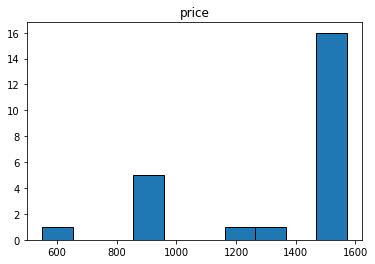

In [5]:
#Histogram of price from Orders Dataset
totalorderquery.hist("price",edgecolor="black",grid=False,weights=totalorderquery.order_qty);

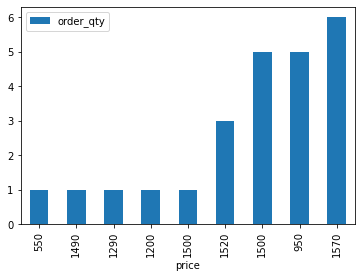

In [7]:
#Bar-chart of price from Orders Dataset
totalorderquerysummary=totalorderquery.groupby(["item_id","price"]).agg({'order_qty': 'sum','order_id': 'first'}).reset_index().sort_values("order_qty")
totalorderquerysummary.plot.bar( x="price",y="order_qty");

In [8]:
totalorderquery.groupby(["item_id","price"]).agg({'order_qty': 'sum','order_id': 'first'}).head()

order_qty        order_id
item_id        price                           
21548178643638 1500           5  52119420824446
21743259152562 950            5  52137487208423
               1520           3  52116410636904
               1570           6  52121427200365
22015434430682 550            1  52131466765703

In [9]:
totalorderquerysummary=totalorderquery.groupby(["item_id","price"]).agg({'order_qty': 'sum','order_id': 'first'}).reset_index().sort_values("order_qty")
mean=sum(totalorderquery["price"]*totalorderquery["order_qty"])/sum(totalorderquery["order_qty"])
stdeV=math.sqrt(sum((totalorderquery["price"]-mean)**2)/(sum(totalorderquery["order_qty"])-1))
print("The mean of the Products in \"Order\" Dataset:", mean)
print("The Standard Deviation of the Products in \"Order\" Dataset:",stdeV)

The mean of the Products in "Order" Dataset: 1344.1666666666667
The Standard Deviation of the Products in "Order" Dataset: 294.6614367691174


In [10]:
# price bounds with confidence level of 95% z=1.96
LowCI= mean - 1.96*(stdeV/math.sqrt(sum(totalorderquery["order_qty"])))
UpperCI= mean + 1.96*(stdeV/math.sqrt(sum(totalorderquery["order_qty"]))) 
print("The lower bound is", LowCI)
print("The upper bound is", UpperCI)

The lower bound is 1226.2775393965812
The upper bound is 1462.0557939367523


In [11]:
#clear orders to obtain latest order prices from each item_id
totalOrderQuery=totalorderquery.drop_duplicates(
  subset = ['item_id'],
  keep = 'last').reset_index(drop = True)
totalOrderQuery['price']=totalOrderQuery['price'].apply(str)
totalOrderQuery["digits"]=totalOrderQuery["price"].apply(count_digits)
newdf=totalOrderQuery[['item_id', 'price', 'digits']] 
compare = totalGoodQuery.loc[totalGoodQuery["item_id"].isin(totalOrderQuery["item_id"])].copy(deep=True)
compare["digits"]= compare["price"].apply(count_digits)
compare=compare.reset_index(drop=True)
compare = compare[::-1] 
compare=compare.reset_index(drop=True)
compare


,item_id,price,digits
0,22119461311674,1290,4
1,22015434430682,500,3
2,21743259152562,99990,5
3,22120592079997,2000,4
4,21548178643638,1500,4
5,22118250829358,9999990,7


# 5. Boxcox method to determine outliers 


In [12]:
compare['price']=compare['price'].astype(int)
newdf['price'] = newdf['price'].astype(int)

In [19]:
#construction of table to observe unreasonable prices
from scipy import stats
norm_change = pd.DataFrame(stats.boxcox(compare['price']/newdf['price'])[0])
norm_change_upper_bound = norm_change.mean() + 0.8*norm_change.std()
compare['Unreasonable Price'] = np.where((norm_change > norm_change_upper_bound ) , True, False)
norm_change
compare

,item_id,price,digits,Unreasonable Price
0,22119461311674,1290,4,False
1,22015434430682,500,3,False
2,21743259152562,99990,5,True
3,22120592079997,2000,4,False
4,21548178643638,1500,4,False
5,22118250829358,9999990,7,True


In [20]:
validated_products_id = compare.loc[compare['Unreasonable Price'] == False]['item_id']
goods = totalquery.loc[totalquery['item_id'].isin(validated_products_id.values)]

# 6. Regresion Model to determine Recommended item price

In [21]:
#clear dataset to apply regression model
import pandas as pd
import numpy as np
import sklearn
import nltk
from nltk.stem.snowball import SnowballStemmer
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from hanziconv import HanziConv
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import jieba
import jieba.posseg as pseg
from hanziconv import HanziConv
import stopwordsiso
from stopwordsiso import stopwords as st_zh

In [22]:
goods.drop(columns=['category_name','category_id','item_id','seller_nickname','seller_id','file_name'],inplace=True)
goods['zh-name'] = "no name"
goods['en-name'] = "no name"

In [23]:
#cleaning
stop_words_zh = set(st_zh(["zh"]))
stop_words_en = set(stopwords.words('english'))

for i in goods.index:
    cleaned_text = []
    clean = re.sub(r'[^a-zA-Z 0-9 \u4e00-\u9fff]+','',goods.loc[i]['item_name'])
    english_text = " ".join(re.findall("[a-zA-Z 0-9]+",goods.loc[i]['item_name']))
    chinese_text = re.sub("[a-zA-Z 0-9]",'',clean)
    
    if not (english_text == ''):
        goods.at[i,'en-name'] = english_text
    
    if not (chinese_text == ' '):
        goods.at[i,'zh-name'] = chinese_text
    
        
    

In [24]:
goods.head()

,price,item_name,zh-name,en-name
2579,1500,【優格米】PS4 PS5 惡靈古堡8 村莊 RESIDENT EVIL VILLAGE 中文版,優格米惡靈古堡村莊中文版,PS4 PS5 8 RESIDENT EVIL VILLAGE
20056,2000,PS4 PS5 惡靈古堡 8 村莊 BIOHAZARD RESIDENT EVIL VILLAGE 限定特典 鐵盒,惡靈古堡村莊限定特典鐵盒,PS4 PS5 8 BIOHAZARD RESIDENT EVIL VILLAGE
10429,500,【PS4/PS5】惡靈古堡 3 存檔 修改 替換 Save Wizard Cyber RESIDENT EVIL3,惡靈古堡存檔修改替換,PS4 PS5 3 Save Wizard Cyber RESIDENT EVIL3
19968,1290,PS5 惡靈古堡8 村莊 RESIDENT EVIL VILLAGE 二手含特典,惡靈古堡村莊二手含特典,PS5 8 RESIDENT EVIL VILLAGE


In [25]:
lemmatizer = WordNetLemmatizer()

goods['en-name'] = goods['en-name'].astype(str)

for i in goods.index:
      
    word_tokens = word_tokenize(goods.loc[i]['en-name'])
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words_en]
    
    out_sentence = []
    
    for w in word_tokens:
        if w not in stop_words_en:
            out_sentence.append(lemmatizer.lemmatize(w.lower()))
    
    
    goods.at[i,'en-name'] = " ".join(out_sentence)
    

In [26]:
#Regression model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.compose import make_column_transformer
from scipy.sparse import hstack
import lightgbm as ltb

X_train, X_test, y_train, y_test = train_test_split(goods[['en-name','zh-name']], goods['price'], 
                                                     test_size=0.25, random_state=42)

In [27]:
vectorizer_en = CountVectorizer(stop_words=stop_words_en)
vec_train_en = vectorizer_en.fit_transform(X_train['en-name'])
vec_test_en = vectorizer_en.transform(X_test['en-name'])

vectorizer_zh = CountVectorizer(tokenizer=jieba.lcut,stop_words=stop_words_zh)
vec_train_zh = vectorizer_zh.fit_transform(X_train['zh-name'])
vec_test_zh = vectorizer_zh.transform(X_test['zh-name'])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Nico\AppData\Local\Temp\jieba.cache
Loading model cost 0.733 seconds.
Prefix dict has been built successfully.


In [28]:
tfidf_transform = text.TfidfTransformer(norm=None)
X_train_tfidf = pd.DataFrame(columns=['zh','en'])
X_test_tfidf = pd.DataFrame(columns=['zh','en'])

X_train_tfidf_zh = tfidf_transform.fit_transform(vec_train_zh)
X_test_tfidf_zh = tfidf_transform.transform(vec_test_zh)


X_train_tfidf_en = tfidf_transform.fit_transform(vec_train_en)
X_test_tfidf_en = tfidf_transform.transform(vec_test_en)

In [29]:
X_train = hstack((X_train_tfidf_zh, X_train_tfidf_en))

In [30]:
model = ltb.LGBMRegressor()
model.fit(X_train, y_train)

LGBMRegressor()

In [31]:
vec_test_zh = vectorizer_zh.transform([''])
X_test_tfidf_zh = tfidf_transform.fit_transform(vec_test_zh)

vec_test_en = vectorizer_en.transform(['Verbatim'])
X_test_tfidf_en = tfidf_transform.fit_transform(vec_test_en)

X_test = hstack((X_test_tfidf_zh, X_test_tfidf_en))

In [32]:
#prediction
predicted_y = model.predict(X_test)
predicted_y=predicted_y[0]
print("predicted reasonalbe price: ",predicted_y.round(2))

predicted reasonalbe price:  1096.67


# 7. Boxplot to determinate price range bounds. 

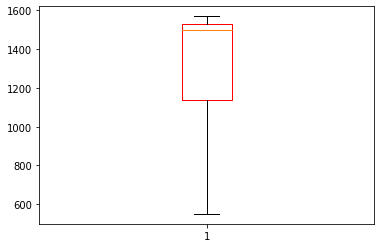

In [33]:
plt.boxplot(totalorderquery['price'], boxprops=dict(color='red'))
plt.show()

In [34]:
totalorderquery['price'].describe()

count      24.000000
mean     1344.166667
std       294.661437
min       550.000000
25%      1137.500000
50%      1500.000000
75%      1532.500000
max      1570.000000
Name: price, dtype: float64

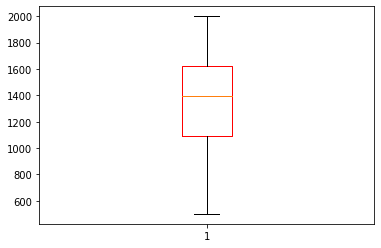

In [35]:
plt.boxplot(goods['price'].astype(int), boxprops=dict(color='red'))
plt.show()

In [36]:
goods['price'].astype(int).describe()

count       4.000000
mean     1322.500000
std       623.985844
min       500.000000
25%      1092.500000
50%      1395.000000
75%      1625.000000
max      2000.000000
Name: price, dtype: float64

In [37]:
firstQuartile1= goods['price'].astype(int).quantile( 0.25)
thirdQuartile1= goods['price'].astype(int).quantile( 0.75) 
firstQuartile2=totalorderquery["price"].astype(int).quantile( 0.25)
thirdQuartile2= totalorderquery['price'].astype(int).quantile( 0.75)

In [38]:
print("The reasonable price is between:", max(firstQuartile1,firstQuartile2) , "and", min(thirdQuartile1,thirdQuartile2) )

The reasonable price is between: 1137.5 and 1532.5


# 8. Results Summary

In [39]:
#Quartiles 
print("The reasonable price for Quartiles Method is between:",round(max(firstQuartile1,firstQuartile2)) , "and", round(min(thirdQuartile1,thirdQuartile2)) ) 
#Regression 
print("The reasonable price for the Regression Method is:",round(predicted_y)) 
#Statistic Confidence Interval 95% 
print("The reasonable price for the Confidence Interval Method is between:", round(LowCI) , "and", round(UpperCI))





The reasonable price for Quartiles Method is between: 1138 and 1532
The reasonable price for the Regression Method is: 1097
The reasonable price for the Confidence Interval Method is between: 1226 and 1462
